<a href="https://colab.research.google.com/github/ebrambilla42/rm_assignments/blob/master/RM_A03_Group_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install plotly==4.13.0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

# Research Methods <br>UHH - Knowledge Technology Research Group - WiSe 2020/2021
## Assignment #3 - Multivariate EDA & Testing Procedures

***
### Group: C
### Names of members: 

1. Aida Usmanova
2. Emilio Brambilla
3. Navneet Singh Arora

***

### Instructions:

Please answer the questions below. Copy this notebook and enter your answers underneath each task description, inserting cells as needed. You may use a combination of [python 3](https://python3.guide/), [markdown](http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html), and [LaTex](https://towardsdatascience.com/write-markdown-latex-in-the-jupyter-notebook-10985edb91fd) to formulate your responses. In order to successfully complete the assignment, you will need the lecture material provided in the [RM moodle course](https://lernen.min.uni-hamburg.de/course/view.php?id=582), especially L04 & L05. **Make sure to use only a copy of this notebook for your answers instead of a new/blank notebook.** 

### Grading Criteria:

In order to successfully pass this assignment, you will need **at least a total of 70 points out of 100 points**, and every task has to be tackled.

### Submission:

Please upload the following two files **until Tuesday, 8 December 2020, 19:59 CET (Germany)** together in a .zip archive in moodle:
1. a (single) copy of this jupyter notebook containing your answers for all tasks (file extension: .ipynb)
2. an [exported PDF document](https://jupyterlab.readthedocs.io/en/stable/user/export.html) of the jupyter notebook (file extension: .pdf)

### Presentation:

Make sure that each (!) group member takes part in solving this assignment and is prepared to answer questions and/or present solutions from your submitted notebook during our assignment revision meeting scheduled for **Wednesday, 16 December 2020, 12:00 - 13:30 CET (Germany)**.

### File Naming:

Add the group letter to the file name prior to submission. For example, if your group letter is "A" (see group selection in moodle), you would use the following filename: 
1. RM_A03_Group_A.ipynb 
2. RM_A03_Group_A.pdf

***
***

**Remember you are a senior scientist, view your results critically and write about it. (Imagine your are a member of the Covid-Research-Committee - fellow scientists, journalists, politicians are interested in your results and your critical scientific evalutation.)**

#### Task 1 **[30 points] Correlation Analysis** 

For this task, your goal is to perform a correlation analysis on the two statistical measurements "[Daily COVID-19 tests per thousand people](https://ourworldindata.org/grapher/full-list-daily-covid-19-tests-per-thousand?time=2020-02-18..latest)" and "[Daily new confirmed COVID-19 deaths per million people](https://ourworldindata.org/coronavirus-data-explorer?tab=map&zoomToSelection=true&country=GBR~USA~ESP~ITA~BRA~IND~KOR&region=World&deathsMetric=true&interval=daily&hideControls=true&perCapita=true&smoothing=0&pickerMetric=location&pickerSort=asc)", with each country representing one data sample. Use the latest date in each of the two datasets, that you can download using the links provided above (when accessing each URL, go to menu item _download_ right below the visualization plot). 
1. Download, import and merge both datasets. Create a scatter plot of 'Daily tests per 1000 people' vs. 'Daily deaths per 1M people'. Since the dataset is being updated on a daily basis, make sure to include the reference date in the plot title/description. <br>_Hint: If you need some inspiration, the website provides scatter plots of other COVID-19 measurements as well._         
2. Fit a linear regression model to the data (e.g., using the [scikit learn library](https://scikit-learn.org/stable/index.html)) and add the regression line to the scatterplot from the first part of the task.
3. Calculate the Pearson's correlation coefficient of the two measurements and explain your result briefly.
4. Explain in your own words the following factors that have to be considered when interpreting a correlation coefficient: (A) non-linear relationship, (B) outliers, and (C) correlation vs. causality. 

### 1.1 Merge both datasets and create a scatter plot

We start with importing needed libraries and reading two datasets ("Daily COVID-19 tests per thousand people" and "Daily new confirmed COVID-19 deaths per million people"). Keep in mind that both datasets are for Novermebr 27.

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import AutoDateFormatter, AutoDateLocator
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
import scipy
%matplotlib inline
import plotly.graph_objects as go
import plotly.express as px



In [ ]:
# dataset for Novemeber 27
daily_tests = pd.read_csv('/content/drive/datasets/full-list-daily-covid-19-tests-per-thousand.csv')
daily_new_confirmed = pd.read_csv('owid-covid-data.csv')

Firstly we are getting to know with the datasets

In [ ]:
# Exploring dataset 1
daily_tests.head(5)

In [ ]:
# Exploring dataset 2
daily_new_confirmed.head(5)

In [ ]:
daily_tests.describe()

In [ ]:
daily_new_confirmed.describe()

For the first task we merge two datasests with pandas' merge() function. Two datasets have similar two columns "Location" and "Date". We combine datasets so that these two columns will match.

In [ ]:
# Merging two datasets
df_merged = pd.merge(daily_tests, daily_new_confirmed,  how='left', left_on=['Entity','Date'], right_on = ['location','date'])
df_merged.drop(['Entity', 'Date', 'iso_code'],
  axis='columns', inplace=True)

To prepare data for scatter plot, we group it by "location" and "continent" columns. But in order not to make these columns as indexes, we specify attribute as_index=False.

In [ ]:
# Group by location and continent
grouped = df_merged.groupby(['location', 'continent'], as_index=False)[df_merged.columns[:-1]].sum()
grouped.head(5)

To make scatter plot the Plotly's scatter() function is used. total_cases_per_million is an X-axis and new_tests_per_thousand_x is Y-axis.

In [ ]:
# Scatter plot
scatter_fig = go.Figure()
scatter_fig = px.scatter(grouped, x="total_cases_per_million", y="new_tests_per_thousand_x", text="location", color="continent")
# scatter_fig = px.scatter(grouped, x="total_cases_per_million", y="new_tests_per_thousand_x",  color="continent")
scatter_fig.update_layout(width=1000, title_text="Figure-1. Scatter plot of 'Daily tests per 1000 people' vs. 'Daily deaths per 1M people'", title_x=0.5)
scatter_fig.update_traces(textposition='top center')

scatter_fig.show()

In the Figure-1 points represent countries that are divided on subgroups by color according to the continent. The graph shows that there are only few countries that have amount of tests more that 500. As well as there are not many countries which have death cases greater than 2 million.

To better understand the distribution we decided to look closer to the bottom left corner, which is the most concentrated region.

In [ ]:
grouped_bl = df_merged.groupby(['location', 'continent'], as_index=False)[df_merged.columns[:-1]].sum()

zoom_df = grouped_bl.loc[(grouped_bl['new_tests_per_thousand_x'] < 500) & (grouped_bl['total_cases_per_million'] < 70000)]

scatter_bl_fig = go.Figure()
scatter_bl_fig = px.scatter(zoom_df, x="total_cases_per_million", y="new_tests_per_thousand_x", text="location", color="continent")
# scatter_fig = px.scatter(grouped, x="total_cases_per_million", y="new_tests_per_thousand_x",  color="continent")
scatter_bl_fig.update_layout(title_text="Scatter plot of 'Daily tests per 1000 people' vs. 'Daily deaths per 1M people', zoom 0 - 70k deaths per 1M", title_x=0.5)
scatter_bl_fig.update_traces(textposition='top center')

scatter_bl_fig.show()

This graph zooms to the bottom left corner, where death rate is between 0 and 70K. Here we can see that most of the African countries didn't have much tests per thousand people, this may be due to the fact that many African countries are poor and people don't have access to the high-quality healthcare. The same is applied to some of the Asian countries (Vietnam, Taiwan, Myanmar, etc.). However, the death rate is relatively low. This phenomena can be explained by the fact that the Covid19 doesn't survive in hot temperature.




In [ ]:
zoom_df = grouped_bl.loc[(grouped_bl['new_tests_per_thousand_x'] < 500) & (grouped_bl['total_cases_per_million'] > 70000) & (grouped_bl['total_cases_per_million'] < 500000)]

scatter_bl_fig = go.Figure()
scatter_bl_fig = px.scatter(zoom_df, x="total_cases_per_million", y="new_tests_per_thousand_x", text="location", color="continent")
# scatter_fig = px.scatter(grouped, x="total_cases_per_million", y="new_tests_per_thousand_x",  color="continent")
scatter_bl_fig.update_layout(title_text="Scatter plot of 'Daily tests per 1000 people' vs. 'Daily deaths per 1M people', zoom 70k - 500k deaths per 1M", title_x=0.5)
scatter_bl_fig.update_traces(textposition='top center')

scatter_bl_fig.show()

This graph shows countries with death rate between 70K and 500K. The countries at the bottom are also known as poor countries, most of them are from Africa, Central America and South-East Asia.

Next 6 graphs shows distribution of counties by continent.

In [ ]:
asia_df = df_merged.loc[df_merged['continent'] == 'Asia']

grouped_asia = asia_df.groupby(['location'], as_index=False)[asia_df.columns[:-1]].sum()

scatter_asia_fig = go.Figure()
scatter_asia_fig = px.scatter(grouped_asia, x="total_cases_per_million", y="new_tests_per_thousand_x", text="location")
# scatter_fig = px.scatter(grouped, x="total_cases_per_million", y="new_tests_per_thousand_x",  color="continent")
scatter_asia_fig.update_layout(width=1000, title_text="Scatter plot of 'Daily tests per 1000 people' vs. 'Daily deaths per 1M people' for Asia", title_x=0.5)
scatter_asia_fig.update_traces(textposition='top center')

scatter_asia_fig.show()

This scatter plot shows only Asian countries. We can clearly see that the trend goes up. In the case of Asia, it is clear that coutries distributed according to their economy and life-quality state. On the top there are wealthy countries and on the bottom countries with lower life-quality rate. And we also should keep in mind that Asia, especially East and South-East Asia, is the most populated region in the world, this fact may also affected the virus spread.

In [ ]:
europe_df = df_merged.loc[df_merged['continent'] == 'Europe']

grouped_europe = europe_df.groupby(['location'], as_index=False)[europe_df.columns[:-1]].sum()

scatter_europe_fig = go.Figure()
scatter_europe_fig = px.scatter(grouped_europe, x="total_cases_per_million", y="new_tests_per_thousand_x", text="location")
# scatter_fig = px.scatter(grouped, x="total_cases_per_million", y="new_tests_per_thousand_x",  color="continent")
scatter_europe_fig.update_layout(width=1000, title_text="Scatter plot of 'Daily tests per 1000 people' vs. 'Daily deaths per 1M people' for Europe", title_x=0.5)
scatter_europe_fig.update_traces(textposition='top center')

scatter_europe_fig.show()

We observe same situation in Europe. Countries are distributed according to the following factors: overall economic state, life-quality and healthcare. Closer to left there are mostly East Eropian countries and to the right there sre West Europian counties.

In [ ]:
namerica_df = df_merged.loc[df_merged['continent'] == 'North America']

grouped_namerica = namerica_df.groupby(['location'], as_index=False)[namerica_df.columns[:-1]].sum()

scatter_namerica_fig = go.Figure()
scatter_namerica_fig = px.scatter(grouped_namerica, x="total_cases_per_million", y="new_tests_per_thousand_x", text="location")
# scatter_fig = px.scatter(grouped, x="total_cases_per_million", y="new_tests_per_thousand_x",  color="continent")
scatter_namerica_fig.update_layout(width=1000, title_text="Scatter plot of 'Daily tests per 1000 people' vs. 'Daily deaths per 1M people' for North America", title_x=0.5)
scatter_namerica_fig.update_traces(textposition='top center')

scatter_namerica_fig.show()

In [ ]:
samerica_df = df_merged.loc[df_merged['continent'] == 'South America']

grouped_samerica = samerica_df.groupby(['location'], as_index=False)[samerica_df.columns[:-1]].sum()

scatter_samerica_fig = go.Figure()
scatter_samerica_fig = px.scatter(grouped_samerica, x="total_cases_per_million", y="new_tests_per_thousand_x", text="location")
# scatter_fig = px.scatter(grouped, x="total_cases_per_million", y="new_tests_per_thousand_x",  color="continent")
scatter_samerica_fig.update_layout(width=1000, title_text="Scatter plot of 'Daily tests per 1000 people' vs. 'Daily deaths per 1M people' for South America", title_x=0.5)
scatter_samerica_fig.update_traces(textposition='top center')

scatter_samerica_fig.show()

In [ ]:
africa_df = df_merged.loc[df_merged['continent'] == 'Africa']

grouped_africa = africa_df.groupby(['location'], as_index=False)[africa_df.columns[:-1]].sum()

scatter_africa_fig = go.Figure()
scatter_africa_fig = px.scatter(grouped_africa, x="total_cases_per_million", y="new_tests_per_thousand_x", text="location")
# scatter_fig = px.scatter(grouped, x="total_cases_per_million", y="new_tests_per_thousand_x",  color="continent")
scatter_africa_fig.update_layout(width=1000, title_text="Scatter plot of 'Daily tests per 1000 people' vs. 'Daily deaths per 1M people' for Africa", title_x=0.5)
scatter_africa_fig.update_traces(textposition='top center')

scatter_africa_fig.show()

In [ ]:
oceania_df = df_merged.loc[df_merged['continent'] == 'Oceania']

grouped_oceania = oceania_df.groupby(['location'], as_index=False)[oceania_df.columns[:-1]].sum()

scatter_oceania_fig = go.Figure()
scatter_oceania_fig = px.scatter(grouped_oceania, x="total_cases_per_million", y="new_tests_per_thousand_x", text="location")
# scatter_fig = px.scatter(grouped, x="total_cases_per_million", y="new_tests_per_thousand_x",  color="continent")
scatter_oceania_fig.update_layout(width=1000, title_text="Scatter plot of 'Daily tests per 1000 people' vs. 'Daily deaths per 1M people' for Oceania", title_x=0.5)
scatter_oceania_fig.update_traces(textposition='top center')

scatter_oceania_fig.show()

By focusing on concentrated zones and continents, we came to conclusion that the amount of tests per thousand people depends on the overall economical state of the country, and the death per million rate mostly depends on the population.

### 1.2 Fit a linear regression model to the data and add the regression line to the scatterplot

In [ ]:
# Regression line
from sklearn.linear_model import LinearRegression

# regression
reg = LinearRegression().fit(np.vstack(grouped['total_cases_per_million']), grouped['new_tests_per_thousand_x'])
grouped['bestfit'] = reg.predict(np.vstack(grouped['total_cases_per_million']))

# plotly figure setup
reg_fig=go.Figure()
reg_fig.add_trace(go.Scatter(name='Tests per 1K vs Cases per 1M', x=grouped['total_cases_per_million'], y=grouped['new_tests_per_thousand_x'].values, mode='markers'))
reg_fig.add_trace(go.Scatter(name='line of best fit', x=grouped['total_cases_per_million'], y=grouped['bestfit'], mode='lines'))

# plotly figure layout
reg_fig.update_layout(xaxis_title = 'total_cases_per_million', yaxis_title = 'new_tests_per_thousand_x')
reg_fig.update_layout(width=1000, title_text="Figure-2. Scatter plot of 'Daily tests per 1000 people' vs. 'Daily deaths per 1M people' with Regression", title_x=0.5);

reg_fig.show()

By plotting regression line we can observe the general trend of data. The trend is positive

In [ ]:
# regression
asia_df = df_merged.loc[df_merged['continent'] == 'Asia']

grouped_asia = asia_df.groupby(['location'], as_index=False)[asia_df.columns[:-1]].sum()
# grouped_asia = grouped.loc[grouped['continent'] == "Asia"]
# grouped_africa = grouped.loc[grouped['continent'] == "Africa"]
# grouped_europe = grouped.loc[grouped['continent'] == "Europe"]
# grouped_namerica = grouped.loc[grouped['continent'] == "North America"]
# grouped_samerica = grouped.loc[grouped['continent'] == "South America"]
# grouped_oceania = grouped.loc[grouped['continent'] == "Oceania"]

reg = LinearRegression().fit(np.vstack(grouped_asia['total_cases_per_million']), grouped_asia['new_tests_per_thousand_x'])
grouped_asia['bestfit'] = reg.predict(np.vstack(grouped_asia['total_cases_per_million']))

# reg = LinearRegression().fit(np.vstack(grouped_europe['total_cases_per_million']), grouped_europe['new_tests_per_thousand_x'])
# grouped_europe['bestfit'] = reg.predict(np.vstack(grouped_europe['total_cases_per_million']))

# reg = LinearRegression().fit(np.vstack(grouped_africa['total_cases_per_million']), grouped_africa['new_tests_per_thousand_x'])
# grouped_africa['bestfit'] = reg.predict(np.vstack(grouped_africa['total_cases_per_million']))

# reg = LinearRegression().fit(np.vstack(grouped_namerica['total_cases_per_million']), grouped_namerica['new_tests_per_thousand_x'])
# grouped_namerica['bestfit'] = reg.predict(np.vstack(grouped_namerica['total_cases_per_million']))

# reg = LinearRegression().fit(np.vstack(grouped_samerica['total_cases_per_million']), grouped_samerica['new_tests_per_thousand_x'])
# grouped_samerica['bestfit'] = reg.predict(np.vstack(grouped_samerica['total_cases_per_million']))

# reg = LinearRegression().fit(np.vstack(grouped_oceania['total_cases_per_million']), grouped_oceania['new_tests_per_thousand_x'])
# grouped_oceania['bestfit'] = reg.predict(np.vstack(grouped_oceania['total_cases_per_million']))

# plotly figure setup
reg_fig=go.Figure()
reg_fig.add_trace(go.Scatter(name='Tests per 1K vs Cases per 1M', x=grouped['total_cases_per_million'], y=grouped['new_tests_per_thousand_x'].values, mode='markers'))
reg_fig.add_trace(go.Scatter(name='line of best fit Asia', x=grouped_asia['total_cases_per_million'], y=grouped_asia['bestfit'], mode='lines'))
# reg_fig.add_trace(go.Scatter(name='line of best fit Europe', x=grouped_europe['total_cases_per_million'], y=grouped_europe['bestfit'], mode='lines'))
# reg_fig.add_trace(go.Scatter(name='line of best fit Africa', x=grouped_africa['total_cases_per_million'], y=grouped_africa['bestfit'], mode='lines'))
# reg_fig.add_trace(go.Scatter(name='line of best fit North America', x=grouped_namerica['total_cases_per_million'], y=grouped_namerica['bestfit'], mode='lines'))
# reg_fig.add_trace(go.Scatter(name='line of best fit South America', x=grouped_samerica['total_cases_per_million'], y=grouped_samerica['bestfit'], mode='lines'))
# reg_fig.add_trace(go.Scatter(name='line of best fit Oceania', x=grouped_oceania['total_cases_per_million'], y=grouped_oceania['bestfit'], mode='lines'))

# plotly figure layout
reg_fig.update_layout(xaxis_title = 'total_cases_per_million', yaxis_title = 'new_tests_per_thousand_x')
reg_fig.update_layout(width=1000, title_text="Figure-2. Scatter plot of 'Daily tests per 1000 people' vs. 'Daily deaths per 1M people' with Regression", title_x=0.5);

reg_fig.show()

### 1.3 Calculate the Pearson's correlation coefficient of the two measurements and explain your result briefly

To calculate Pearson's correlation coeddicient we take two columns that should be measured and correlate first collumn with the second, using corr() function.

In [ ]:
# Pearson's correlation coefficient
column_1 = grouped["total_cases_per_million"]
column_2 = grouped["new_tests_per_thousand_x"]
correlation = column_1.corr(column_2)
print("Pearson's correlation coefficient: ", correlation)

Pearson's correlation coefficient tells how strongly two measurments are connected. In this case Pearson's correlation coefficient is equal to 0.4597. Consequently, "total_cases_per_million" and "new_tests_per_thousand_x" have moderate correlation degree, we can assume there is a medium correlation between them. We can say that with the growth of death outcomes the amount of tests for Covid19 increases.

### 1.4 Explain in your own words the following factors that have to be considered when interpreting a correlation coefficient: (A) non-linear relationship, (B) outliers, and (C) correlation vs. causality

A) The correlation does not reveal any existing non-linear relationship between two variables. It means that there should be used other approach to evaluate relationship.

B) Outlires are extremelly large or small values of characteristic. Outlires affect Pearson's correlation to the most significant extent, since the value of this coefficient is directly proportional to the deviation of the variable from the mean.

C) Correlation does not provide any information about causality of relationship, it may only assume that there might exist some connection between two variables

#### Task 2 **[40 points] Time Series Analysis**

Your goal for this task is to do a time series analysis on the "Number of daily new confirmed COVID-19 cases in Germany" using the [RKI COVID-19 database](https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0?page=24101) from both previous assignments.
1. Plot a timeline of the number of new COVID-19 cases in Germany per day, starting with the date of the first confirmed case. Evaluate and interprete your plot? What do you see - what don't you see?
2. Perform a mean smoothing on the time series above and add the smoothed curve to the previous plot. Make sure the viewer can clearly recognize which line is the smoothed one. For the smoothing procedure, choose a window size $n$ that makes most sense to you and explain & evaluate your choice briefly.
3. Make yourself familiar with the [ARIMA model](https://towardsdatascience.com/understanding-arima-time-series-modeling-d99cd11be3f8) for time series modeling. Use the corresponding [ARIMA python package](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html) to predict the future number of daily new confirmed COVID-19 cases in Germany. Plot both the model summary and a visualization of the predicted timeline (both of which the ARIMA package provides per default). Evaluate & explain your results.  
4. In time series analysis, there are four main features/components that we have to consider: (A) seasonal variation, (B) other cyclic variation, (C) secular trend, and (D) other irregular variations. For each of these features, explain its properties briefly, give an example scenario, and explain whether/how to handle it when working with time series data.   

<hr style="border:1px solid gray"></hr>

### Question: 2.1
Plot a timeline of the number of new COVID-19 cases in Germany per day, starting with the date of the first confirmed case. Evaluate and interprete your plot? What do you see - what don't you see?

### Solution: 2.1

In [ ]:
# Importing Libraries to carry out various tasks in this assignment

import pandas as pd
from datetime import datetime
import plotly.figure_factory as ff
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

In [ ]:
# Fetching Data from RKI COVID-19 Database

file_url = 'https://prod-hub-indexer.s3.amazonaws.com/files/dd4580c810204019a7b8eb3e0b329dd6/0/full/4326/dd4580c810204019a7b8eb3e0b329dd6_0_full_4326.csv';
covid_data = pd.read_csv(file_url);

In [ ]:
# Renaming columns for easy interpretation

covid_data = covid_data.rename(
                        columns = {
                            "ObjectId": "Object_Id",
                            "IdBundesland": "State_Id",
                            "Bundesland": "State",
                            "Landkreis": "District",
                            "Altersgruppe": "Age_Group",
                            "Geschlecht": "Sex",
                            "AnzahlFall": "Number_of_Cases",
                            "AnzahlTodesfall": "Number_of_Deaths",
                            "Meldedatum": "Reporting_Date",
                            "IdLandkreis": "District_Id",
                            "Datenstand": "Last_Updated",
                            "NeuerFall": "New_Case",
                            "NeuerTodesfall": "New_Death",
                            "Refdatum": "Reference_Date",
                            "NeuGenesen": "New_Recovered",
                            "AnzahlGenesen": "Number_of_Recovered",
                            "IstErkrankungsbeginn": "Disease_Onset",
                            "Altersgruppe2": "Age_Group2"
                        }
                    );

In [ ]:
# Filtering Data for 'New Cases only'

new_case_covid_data = covid_data[covid_data['New_Case'] >= 0];

In [ ]:
# Grouping Covid Data of Germany by Reporting Date

new_case_per_day_data_sorted = new_case_covid_data.sort_values(by=['Reporting_Date']);
new_case_per_day_data_unformatted = new_case_per_day_data_sorted.groupby('Reporting_Date')['Number_of_Cases'].sum();
new_case_per_day_data = pd.DataFrame(new_case_per_day_data_unformatted).rename_axis('Reporting_Date').reset_index()
new_case_per_day_data['Reporting_Date'] = pd.to_datetime(
    new_case_per_day_data['Reporting_Date']).dt.strftime('%Y-%m-%d');

In [ ]:
# Finding out the date of "First Confirmed Case"

first_confirmed_case = new_case_per_day_data['Reporting_Date'].min()
confirmed_cases_on_first_day = new_case_covid_data['Number_of_Cases'];
print("Germany reported its 'First Confirmed Case' on :", first_confirmed_case);
print("Cases reported on First Day in Germany :", confirmed_cases_on_first_day[0]);

Germany reported its 'First Confirmed Case' on : 2020-01-02
Cases reported on First Day in Germany : 1


As we can see from the **RKI COVID-19 Data**, Germany reported its **first case** on **2nd January 2020**.<br>
Only **1** case was reported on the first day.

In [ ]:
# Plotting Timeline of New Cases every day in Germany

fig1 = go.Figure();
fig1 = px.line(new_case_per_day_data, x='Reporting_Date', y="Number_of_Cases", range_x=['2020-01-01','2020-12-31']);
fig1.update_layout(title_text='Figure-1. -- Timeline of new COVID-19 Cases per day in Germany', title_x=0.5);
fig1.update_xaxes(dtick="M1",tickformat="%b");
fig1.update_yaxes(tickformat="20");
fig1.update_layout(showlegend=True);

In [ ]:
# Plotting Timeline with Highlighted Regions

fig2 = go.Figure();
fig2 = px.line(new_case_per_day_data, x='Reporting_Date', y="Number_of_Cases", range_x=['2020-01-01','2020-12-31']);
fig2.update_layout(title_text='Figure-2. -- Timeline with First and Second Wave of New COVID-19 Cases per day in Germany', title_x=0.5);
fig2.update_xaxes(dtick="M1",tickformat="%b");
fig2.update_yaxes(tickformat="20");
fig2.update_layout(showlegend=True);
before_june = new_case_per_day_data[new_case_per_day_data['Reporting_Date'] < '2020-06-01'];
x0 = before_june[before_june['Number_of_Cases'] > 1000]['Reporting_Date'].min();
x1 = before_june[before_june['Number_of_Cases'] > 1000]['Reporting_Date'].max();
fig2.add_vrect(x0=x0, x1=x1,fillcolor="LightSalmon", opacity=0.5,layer="below", line_width=0);
after_june = new_case_per_day_data[new_case_per_day_data['Reporting_Date'] > '2020-06-01'];
x0 = after_june[after_june['Number_of_Cases'] > 1000]['Reporting_Date'].min();
x1 = after_june[after_june['Number_of_Cases'] > 1000]['Reporting_Date'].max();
fig2.add_vrect(x0=x0, x1=x1,fillcolor="LightSalmon", opacity=0.5,layer="below", line_width=0);

AttributeError: ignored

In [ ]:
# Plotting Timeline with Text and Annotations

fig3 = go.Figure();
fig3 = px.line(new_case_per_day_data, x='Reporting_Date', y="Number_of_Cases", range_x=['2020-01-01','2020-12-31']);
fig3.update_layout(title_text='Figure-3. -- Timeline with Peak Infections across Waves of New COVID-19 Cases per day in Germany', title_x=0.5);
fig3.update_xaxes(dtick="M1",tickformat="%b");
fig3.update_yaxes(tickformat="20");
before_june = new_case_per_day_data[new_case_per_day_data['Reporting_Date'] < '2020-06-01'];
x0 = before_june[before_june['Number_of_Cases'] > 1000]['Reporting_Date'].min();
x1 = before_june[before_june['Number_of_Cases'] > 1000]['Reporting_Date'].max();
fig3.add_vrect(x0=x0, x1=x1,fillcolor="LightSalmon", opacity=0.5,layer="below", line_width=0);
after_june = new_case_per_day_data[new_case_per_day_data['Reporting_Date'] > '2020-06-01'];
x0 = after_june[after_june['Number_of_Cases'] > 1000]['Reporting_Date'].min();
x1 = after_june[after_june['Number_of_Cases'] > 1000]['Reporting_Date'].max();
fig3.add_vrect(x0=x0, x1=x1,fillcolor="LightSalmon", opacity=0.5,layer="below", line_width=0);
fig3.add_shape(type="line",
              x0=new_case_per_day_data['Reporting_Date'].min(), 
              y0=new_case_per_day_data[new_case_per_day_data['Reporting_Date'] < '2020-05-01']['Number_of_Cases'].max(), 
              x1=new_case_per_day_data[new_case_per_day_data['Number_of_Cases'] == new_case_per_day_data[new_case_per_day_data['Reporting_Date'] < '2020-05-01']['Number_of_Cases'].max()]['Reporting_Date'].values[0], 
              y1=new_case_per_day_data[new_case_per_day_data['Reporting_Date'] < '2020-05-01']['Number_of_Cases'].max(), 
    line=dict(
        color="red",
        width=1,
    )
);
fig3.add_shape(type="line",
              x0=new_case_per_day_data[new_case_per_day_data['Number_of_Cases'] == new_case_per_day_data[new_case_per_day_data['Reporting_Date'] < '2020-05-01']['Number_of_Cases'].max()]['Reporting_Date'].values[0], 
              y0='0', 
              x1=new_case_per_day_data[new_case_per_day_data['Number_of_Cases'] == new_case_per_day_data[new_case_per_day_data['Reporting_Date'] < '2020-05-01']['Number_of_Cases'].max()]['Reporting_Date'].values[0], 
              y1=new_case_per_day_data[new_case_per_day_data['Reporting_Date'] < '2020-05-01']['Number_of_Cases'].max(), 
    line=dict(
        color="red",
        width=1,
    )
);
fig3.add_annotation(
        x=new_case_per_day_data[new_case_per_day_data['Number_of_Cases'] == new_case_per_day_data[new_case_per_day_data['Reporting_Date'] < '2020-05-01']['Number_of_Cases'].max()]['Reporting_Date'].values[0],
        y=new_case_per_day_data[new_case_per_day_data['Reporting_Date'] < '2020-05-01']['Number_of_Cases'].max(),
        text=str(new_case_per_day_data[new_case_per_day_data['Reporting_Date'] < '2020-05-01']['Number_of_Cases'].max()) + str(" Cases"),
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="red",
        opacity=0.8
        );
fig3.add_annotation(
        x=new_case_per_day_data[new_case_per_day_data['Number_of_Cases'] == new_case_per_day_data[new_case_per_day_data['Reporting_Date'] < '2020-05-01']['Number_of_Cases'].max()]['Reporting_Date'].values[0],
        y=0,
        text=str("Peak Date: ") + str(new_case_per_day_data[new_case_per_day_data['Number_of_Cases'] == new_case_per_day_data[new_case_per_day_data['Reporting_Date'] < '2020-05-01']['Number_of_Cases'].max()]['Reporting_Date'].values[0]),
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=0,
        ay=30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="red",
        opacity=0.8
        );

fig3.add_shape(type="line",
              x0=new_case_per_day_data['Reporting_Date'].min(), 
              y0=new_case_per_day_data['Number_of_Cases'].max(), 
              x1=new_case_per_day_data[new_case_per_day_data['Number_of_Cases'] == new_case_per_day_data['Number_of_Cases'].max()]['Reporting_Date'].values[0], 
              y1=new_case_per_day_data['Number_of_Cases'].max(),
    line=dict(
        color="red",
        width=1,
    )
);
fig3.add_shape(type="line",
              x0=new_case_per_day_data[new_case_per_day_data['Number_of_Cases'] == new_case_per_day_data['Number_of_Cases'].max()]['Reporting_Date'].values[0], 
              y0='0', 
              x1=new_case_per_day_data[new_case_per_day_data['Number_of_Cases'] == new_case_per_day_data['Number_of_Cases'].max()]['Reporting_Date'].values[0], 
              y1=new_case_per_day_data['Number_of_Cases'].max(),
    line=dict(
        color="red",
        width=1,
    )
);
fig3.add_annotation(
        x=new_case_per_day_data[new_case_per_day_data['Number_of_Cases'] == new_case_per_day_data['Number_of_Cases'].max()]['Reporting_Date'].values[0],
        y=new_case_per_day_data['Number_of_Cases'].max(),
        text=str(new_case_per_day_data['Number_of_Cases'].max()) + str(" Cases"),
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=20,
        ay=-30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="red",
        opacity=0.8
        );
fig3.add_annotation(
        x=new_case_per_day_data[new_case_per_day_data['Number_of_Cases'] == new_case_per_day_data['Number_of_Cases'].max()]['Reporting_Date'].values[0],
        y=0,
        text=str("Peak Date: ") + str(new_case_per_day_data[new_case_per_day_data['Number_of_Cases'] == new_case_per_day_data['Number_of_Cases'].max()]['Reporting_Date'].values[0]),
        showarrow=True,
        font=dict(
            family="Courier New, monospace",
            size=16,
            color="#ffffff"
            ),
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="#636363",
        ax=0,
        ay=30,
        bordercolor="#c7c7c7",
        borderwidth=2,
        borderpad=4,
        bgcolor="red",
        opacity=0.8
        );

fig3.update_layout(showlegend=True);

AttributeError: ignored

In [ ]:
fig1.show();

<div style="text-align: center">
    From the above plot <b>(Figure-1)</b>, we can see the <b>overall trend</b> of <b>COVID-19</b> cases over the year
    in Germany
</div>

In [ ]:
fig2.show();

<div style="text-align: justify">
    Doing further analysis on the <b>COVID-19 Cases Timeline</b>, we observe <b>two distinct areas</b> on the plot 
    <b>(Figure-2)</b> having <b>steep incline and decline</b>, with <b>second incline being much steeper than the
    first</b>.
    <br>
    <br>
    We call these areas <b>First and Second Wave</b> of the pandemic <b>respectively</b>.
    <br>
    <br>
    Another observation from these plots is that the <b>First Wave</b> is much more smaller than the <b>Second
    Wave</b>.
    <br>
    <br>
    One more eye catching phenomenon which we can observe here is that the <b>First Wave</b> starts with the beginning
    of <b>Spring Season</b> and ends with the change of season from Spring to Summer in Germany. Throughout the
    <b>Summer Season</b>, the number of <b>new cases remain extremely low</b>, never crossing 1000 cases until the
    start of <b>Autumn Season</b> and leading into the <b>Winter Season</b> with very slight decline.
    <br>
    <br>
    Therefore, we can see a <b>direct relation</b> between <b>COVID-19 Infection and Temperature</b>, which might have
    gone un-noticed.
</div>


> <b>Note:</b> The First and Second Wave are meagre interpretations from the plot. Beginning and End of these waves is just the representation and from medical point of view, it may differ. <b>Minimum number of new cases</b> in these two waves were/are <b>more than 1000</b>. Hence, it was logical to club them into these <b>two significant categories</b>.

In [ ]:
fig3.show();

<div style="text-align: justify">
    We further try to analyse the <b>peak</b> of these waves. As we can see <b>(Figure-3)</b> that after the peak of 
    First Wave, there is heavy decline in the cases and then it becomes stangnant over the Summer with cases meagrely 
    in 100's. This could also mean that after the First wave, people stopped taking any precautions and as the 
    temperature started dipping again, this lead to a higher impact worsening the situation to a greater level. 
    <br>
    <br>
    Also, <b>lower</b> the temperature, <b>higher</b> is the peak number of cases. 
    This could also mean, that as we enter the <b>Winter Season in Germany</b>, we could see an even worse situation
    in the coming months.
</div>

<div style="text-align: center">
    <b>What can not be Interpretted?</b>
</div>
<div style="text-align: justify">
    Even though we were able to observe a lot, there are a few things which are not visible or clear through this 
    timeline.
    <br>
    <br>
    1) Firstly, we see a continuous line, with no gaps. This could mean, that there was atleast 1 person infected 
    everyday in Germany. This infact is not an accurate observation. There were days when either no person got 
    infected or atleast no infection was reported, which obviously is not visible through this timeline. 
    <br>
    2) Secondly, we can see in the plot that there are sudden spikes all over the plot. But we cannot be certain the 
    spikes are sudden or a gradual increase over a span of time.
</div>

> <b>Note:</b> The gaps in the reporting data were verified manually through the RKI COVID-19 data. Hence, stated in point 1 above.

<hr style="border:1px solid gray"></hr>

### Question: 2.2
Perform a mean smoothing on the time series above and add the smoothed curve to the previous plot. Make sure the viewer can clearly recognize which line is the smoothed one. For the smoothing procedure, choose a window size  𝑛  that makes most sense to you and explain & evaluate your choice briefly.

### Solution: 2.2

In [ ]:
# Computing Mean Smoothing Timeline Series using different Window Sizes

new_case_per_day_data['Window_5']  = new_case_per_day_data.Number_of_Cases.rolling(window=5).mean()
new_case_per_day_data['Window_10'] = new_case_per_day_data.Number_of_Cases.rolling(window=10).mean()
new_case_per_day_data['Window_15'] = new_case_per_day_data.Number_of_Cases.rolling(window=15).mean()
new_case_per_day_data['Window_20'] = new_case_per_day_data.Number_of_Cases.rolling(window=20).mean()
new_case_per_day_data['Window_25'] = new_case_per_day_data.Number_of_Cases.rolling(window=25).mean()
new_case_per_day_data['Window_50'] = new_case_per_day_data.Number_of_Cases.rolling(window=50).mean()

NameError: ignored

In [ ]:
# Plotting Timeline Comparison of Normal Timeline with Mean Smooth Timeline

# Window Size n = 5 Computation

fig4 = go.Figure();
fig4 = px.line(new_case_per_day_data, x='Reporting_Date', y=["Number_of_Cases", "Window_5"], 
               range_x=['2020-01-01','2020-12-31'], 
               labels=dict(variable="Timeline Comparison of per day COVID-19 Cases", value="Total Number of Cases", 
                           Reporting_Date="Reporting Date"));
fig4.data[0].name = "Normal Timeline"
fig4.data[1].name = "Mean Smoothing (Window Size: 5)"
fig4.update_layout(title_text='Figure-4. -- Timeline Comparison -- Normal v/s Mean Smoothing (n = 5)', title_x=0.5);
fig4.update_xaxes(dtick="M1",tickformat="%b", ticklabelmode="period");
fig4.update_yaxes(tickformat="20");
fig4.update_layout(showlegend=True);
fig4.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01));

# Window Size n = 10 Computation

fig5 = go.Figure();
fig5 = px.line(new_case_per_day_data, x='Reporting_Date', y=["Number_of_Cases", "Window_10"], range_x=['2020-01-01','2020-12-31'], 
               labels=dict(variable="Timeline Comparison of per day COVID-19 Cases", value="Total Number of Cases", 
                           Reporting_Date="Reporting Date"));
fig5.data[0].name = "Normal Timeline"
fig5.data[1].name = "Mean Smoothing (Window Size: 10)"
fig5.update_layout(title_text='Figure-5. -- Timeline Comparison -- Normal v/s Mean Smoothing (n = 10)', title_x=0.5);
fig5.update_xaxes(dtick="M1",tickformat="%b", ticklabelmode="period");
fig5.update_yaxes(tickformat="20");
fig5.update_layout(showlegend=True);
fig5.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01));

# Window Size n = 15 Computation

fig6 = go.Figure();
fig6 = px.line(new_case_per_day_data, x='Reporting_Date', y=["Number_of_Cases", "Window_15"], range_x=['2020-01-01','2020-12-31'], 
               labels=dict(variable="Timeline Comparison of per day COVID-19 Cases", value="Total Number of Cases", 
                           Reporting_Date="Reporting Date"));
fig6.data[0].name = "Normal Timeline"
fig6.data[1].name = "Mean Smoothing (Window Size: 15)"
fig6.update_layout(title_text='Figure-6. -- Timeline Comparison -- Normal v/s Mean Smoothing (n = 15)', title_x=0.5);
fig6.update_xaxes(dtick="M1",tickformat="%b", ticklabelmode="period");
fig6.update_yaxes(tickformat="20");
fig6.update_layout(showlegend=True);
fig6.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01));

# Window Size n = 20 Computation

fig7 = go.Figure();
fig7 = px.line(new_case_per_day_data, x='Reporting_Date', y=["Number_of_Cases", "Window_20"], range_x=['2020-01-01','2020-12-31'], 
               labels=dict(variable="Timeline Comparison of per day COVID-19 Cases", value="Total Number of Cases", 
                           Reporting_Date="Reporting Date"));
fig7.data[0].name = "Normal Timeline"
fig7.data[1].name = "Mean Smoothing (Window Size: 20)"
fig7.update_layout(title_text='Figure-7. -- Timeline Comparison -- Normal v/s Mean Smoothing (n = 20)', title_x=0.5);
fig7.update_xaxes(dtick="M1",tickformat="%b", ticklabelmode="period");
fig7.update_yaxes(tickformat="20");
fig7.update_layout(showlegend=True);
fig7.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left",x=0.01));

# Window Size n = 25 Computation

fig8 = go.Figure();
fig8 = px.line(new_case_per_day_data, x='Reporting_Date', y=["Number_of_Cases", "Window_25"], range_x=['2020-01-01','2020-12-31'], 
               labels=dict(variable="Timeline Comparison of per day COVID-19 Cases", value="Total Number of Cases", 
                           Reporting_Date="Reporting Date"));
fig8.data[0].name = "Normal Timeline"
fig8.data[1].name = "Mean Smoothing (Window Size: 25)"
fig8.update_layout(title_text='Figure-8. -- Timeline Comparison -- Normal v/s Mean Smoothing (n = 25)', title_x=0.5);
fig8.update_xaxes(dtick="M1",tickformat="%b", ticklabelmode="period");
fig8.update_yaxes(tickformat="20");
fig8.update_layout(showlegend=True);
fig8.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01));

# Window Size n = 50 Computation

fig9 = go.Figure();
fig9 = px.line(new_case_per_day_data, x='Reporting_Date', y=["Number_of_Cases", "Window_50"], range_x=['2020-01-01','2020-12-31'], 
               labels=dict(variable="Timeline Comparison of per day COVID-19 Cases", value="Total Number of Cases", 
                           Reporting_Date="Reporting Date"));
fig9.data[0].name = "Normal Timeline"
fig9.data[1].name = "Mean Smoothing (Window Size: 50)"
fig9.update_layout(title_text='Figure-9. -- Timeline Comparison -- Normal v/s Mean Smoothing (n = 50)', title_x=0.5);
fig9.update_xaxes(dtick="M1",tickformat="%b", ticklabelmode="period");
fig9.update_yaxes(tickformat="20");
fig9.update_layout(showlegend=True);
fig9.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01));

NameError: ignored

In [ ]:
# Showing and Evaluating various Comparisons

fig4.show()
fig5.show()
fig6.show()
fig7.show()
fig8.show()
fig9.show()

<div style="text-align: justify">
    Here we have plotted the <b>Mean Smoothed Time Series</b> using varying <b>Window Sizes (n = 5, 10, 15, 20, 25 and 
    50)</b>.
    As we see through <b>Figure-4 to Figure-9</b>, when we do the mean smoothing, as the <b>Window Size increases</b>, 
    more and more <b>local features are lost</b> and the time series becomes more general.
    <br>
    <br>
    It is clearly visible then we have <b>lost</b> all the <b>local features</b> when the <b>Window Size is n = 
    50</b> and we <b>retain</b> almost all local features when <b>Window Size is n = 5</b>.
    <br>
    <br>
    Therefore, we <b>choose</b> the <b>Window Size (n = 15)</b>, because we get the trend accurately, maintaining few 
    local features and matching the general trend nicely. In comparison, Windows size of n = 5, retains almost all 
    significant local features and does not really help generalizing the mean smooth time series. For Window Size of n 
    = 10, the mean gets affected and as we can see , it shows an upward trend but in reality, the trend is downwards 
    in the original timeline. Any window size higher than Window Size n = 15, tends to lose a lot more detail and 
    hence loses significance and effectiveness of generalized graph. Hence, we choose to go ahead with Window Size n = 
    15.
</div>

<hr style="border:1px solid gray"></hr>

### Solution: 2.3

<hr style="border:1px solid gray"></hr>

### Solution: 2.4

<hr style="border:1px solid gray"></hr>

In [ ]:
l

#### Task 3 **[30 points] Hypothesis Testing**

Imagine you want to determine whether there is a global difference between male and female in COVID-19 case fatality using the RKI database's confirmed deaths in Germany as sample data.
1. State hypotheses $H_0$ and $H_1$ and briefly evaluate whether they're testable and falsifiable.
2. Define both type 1 ($\alpha$) and type 2 ($\beta$) error for the given hypotheses. What does mean for your hypotheses?
3. What kind of hypothesis test would you perform in order to answer the given question (one-sided or two-sided)? Explain your choice. 
4. (A) Perform the test, provide results and explain & evaluate them. (B) Is the result enough to make a decision whether there are in fact differences or not? (C) What would you suggest?
5. Define the term "Statistical Power" and its characteristics with respect to the given research question.
6. Calculate the power of the test you performed in this task using the [statsmodels TTestIndPower library](https://www.statsmodels.org/dev/generated/statsmodels.stats.power.TTestIndPower.html) and interpret the result. 
7. Suggest variables that may also influence the death rate. 

### 1. State hypotheses  𝐻0  and  𝐻1  and briefly evaluate whether they're testable and falsifiable

H0: p1 - p2 = 0 (Null hypothesis states that there is no difference between male and female fatality)

H1: p1 - p2 != 0 (Alternative hypothesis states that there exist difference between male and female fatality)

Falsifiability: It refers to having enough evidence to contradict the hypothesis i.e Refutibility of the statement. In our hypothesis testing, we are trying to falsify H1. Our hypothesis is falsifiable as we have the dataset available and using that we can show good evidence that there is no difference between male and female fatality.

Testability: It refers to having a hypothesis which can be testable either through experience or through data collection and computation. In our case we have the required data sample for male and female fatalities and hence, doing statitics and calculations on this data will help us gain enough evidence for or against the hypothesis.

### 2. Define both type 1 ( 𝛼 ) and type 2 ( 𝛽 ) error for the given hypotheses

𝛼 = 0.05 (Probability of making type 1 error). 𝛼 is the probability of rejecting H0 (There is no difference between male and female fatality), when in reality H0 is true.

𝛽 = 0.527 (Probability of making type 2 error) **Note**: 𝛽 is calculated in section 4.6. 𝛽 is the probability of accepting H0 (There is no difference between male and female fatality), when in reality H0 is false.

### 3. What kind of hypothesis test would you perform in order to answer the given question (one-sided or two-sided)?

To test our hypothesis we should perform two-tailed test, because we want to test the possibility of the relationship in both directions (Eather male fatality > female fatality or female fatality > male fatality). Our alternative hypothesis (H1) states that male and female fatalitites are not equal, which could any of these two cases.

### 4. (A) Perform the test, provide results and explain & evaluate them. (B) Is the result enough to make a decision whether there are in fact differences or not? (C) What would you suggest?

#### (A) Perform the test, provide results and explain & evaluate them

To perform the test we should find out initial values: number of "success" and total number of trials. In this case we have two independent samples, which means that we take these values for both groups (male and female). Our number of "success" would be number of fatality cases and total number of trials is the number of cases.

In [ ]:
gender_cases = covid_data.groupby('Sex')
infected_gender = gender_cases['Number_of_Cases'].sum().rename_axis('Sex').reset_index()
n1 = (infected_gender[infected_gender['Sex'] == 'M'])['Number_of_Cases'][0]
n2 = (infected_gender[infected_gender['Sex'] == 'W'])['Number_of_Cases'][1]
print('Fatality number for men = ', n1)
print('Fatality number for women = ', n2)

Number of "successes" for men =  578297
Number of "successes" for women =  609999


In [ ]:
death_cases = covid_data[covid_data['New_Death'] >= 0]
gender_death_cases = death_cases.groupby('Sex')
death_gender = gender_death_cases['Number_of_Deaths'].sum().rename_axis('Sex').reset_index()
x1 = (death_gender[death_gender['Sex'] == 'M'])['Number_of_Deaths'][0]
x2 = (death_gender[death_gender['Sex'] == 'W'])['Number_of_Deaths'][1]
print("Total number of cases for men = ", x1)
print("Total number of cases for women = ", x2)

Total number of trials for men =  10403
Total number of trials for women =  8916


After finding fatality and total case numbers, we can define the probability of success on each trial by following formula.

In [ ]:
p1 = x1/n1
p2 = x2/n2
print("The probability of success on each trial for men = ", p1)
print("The probability of success on each trial for men = ", p2)

The probability of success on each trial for men =  0.01798902639992945
The probability of success on each trial for men =  0.014616417403962958


We perform pooling, because we assume that our null hypothesis (H0) is true and proportions are equal.

In [ ]:
p = (x1 + x2)/(n1 + n2)

print("Pooled proportion = ", p)

Pooled proportion =  0.016257733763304767


Now as we have all needed values, we can perform z-test. Z-test allows us to compare two proportions and determine whether they are equal.

In [ ]:
denominator = p*(1-p)*((1/n1)+(1/n2))
z = (p1 - p2)/(np.sqrt(denominator))

print("Z-score = ", z)

Z-score =  14.53024838977369


As we found z-score we use "Table of normal distribution" to find out if it falls into "rejection region". So in our case z-score is equal to 14.5, which means that the p-value is 0. It means that the chance of type I error (rejecting a correct H0) is very small. 

Now we need to visualize our results, to do so we plot normal distribution.


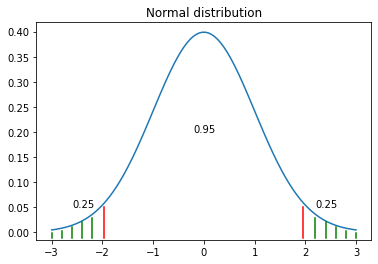

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.title('Normal distribution')

plt.text(-0.2, 0.2, "0.95")
plt.text(-2.6, 0.05, "0.25")
plt.text(2.2, 0.05, "0.25")
plt.axvline(x=-1.96, ymin=0.01, ymax=0.15, color='red', label='-z critical')
plt.axvline(x=-2.2, ymin=0.01, ymax=0.1, color='green')
plt.axvline(x=-2.4, ymin=0.01, ymax=0.08, color='green')
plt.axvline(x=-2.6, ymin=0.01, ymax=0.06, color='green')
plt.axvline(x=-2.8, ymin=0.01, ymax=0.04, color='green')
plt.axvline(x=-3, ymin=0.01, ymax=0.03, color='green')
plt.axvline(x=1.96, ymin=0.01, ymax=0.15, color='red', label='z critical')
plt.axvline(x=2.2, ymin=0.01, ymax=0.1, color='green')
plt.axvline(x=2.4, ymin=0.01, ymax=0.08, color='green')
plt.axvline(x=2.6, ymin=0.01, ymax=0.06, color='green')
plt.axvline(x=2.8, ymin=0.01, ymax=0.04, color='green')
plt.axvline(x=3, ymin=0.01, ymax=0.03, color='green')
plt.show()

On this normal dirstibution shaded areas are our rejection regions. Our 𝛼 = 0.05 that means that z-critical is 1.96 (red lines), and since we have two-tailed test we divide 𝛼 by 2 and get 0.25 on both sides (rejection regions).



Our calculated z-score is 14.5, it means that it lies in the rejection region and it is so strongly statisticaly significant that we can reject the null hypothesis (H0).

We can also see that p-value < 𝛼 (0 < 0.25), which states that we have strong evidence to reject H0. The difference between the proportion of men and women populations is big enough to be statistically significant.

#### (B) Is the result enough to make a decision whether there are in fact differences or not?

The p-value is the area associated with the test statistic. If the probability is less than the level of significance (𝛼), then we believe we have enough statistical evidence to reject the null hypothesis and support the alternative claim.

However, in real life there is a possibility that we may not encountered some instance.
Our hypothesis may be true, but it may not be true all the time.

#### (C) What would you suggest?

We assume that gathering more information will help to get more accurate results and derive correlations from the data. Not only that, removing unknown residual can also help to improve this estimation.

### 5. Define the term "Statistical Power" and its characteristics with respect to the given research question.

"Statistical Power" is the probability of not making type 2 error.
The probability of making a type 2 error is 𝛽, then the
probability of not making a type 2 error is 1 - 𝛽.

In our case "Statistica power" is the probability of assuming that there is no difference between male and female fatality, when actually the difference exists.

### 6. Calculate the power of the test you performed in this task using the statsmodels TTestIndPower library and interpret the result.

In Task 4 we used z-test to find p-value, because our values are binary, so we have to perform Binomial testing. However, statsmodels provide function to calculate power for t-test. So we calculated power of test manually.

In [ ]:
from statsmodels.stats.power import  tt_ind_solve_power

men = covid_data.loc[covid_data['Sex'] == 'M']

mean = men['Number_of_Deaths'].mean()
std = men['Number_of_Deaths'].std()

print("Mean = ", mean)
print("Standard deviation = ", std)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


NameError: ignored

By following formulas we define x-bar.



```
(x_bar - mu)/(std/sqrt(n)) <= - 𝛼/2

(x_bar - mu)/(std/sqrt(n)) >= 𝛼/2
```





In [ ]:
x_bar_left = mean - (1.96*(std/np.sqrt(n1)))
x_bar_right = mean + (1.96*(std/np.sqrt(n1)))

print(x_bar_left)
print(x_bar_right)

0.029010155581299723
0.0364008184091221


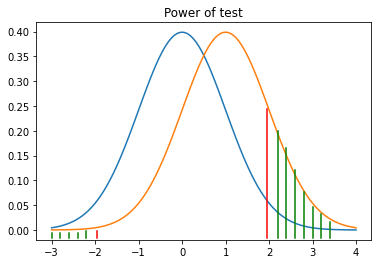

In [ ]:
mu = 0
mu_1 = 1
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.plot(x, stats.norm.pdf(x, mu_1, sigma))
plt.title('Power of test')

plt.axvline(x=-1.96, ymin=0.01, ymax=0.04, color='red', label='-z critical')
plt.axvline(x=-2.2, ymin=0.01, ymax=0.04, color='green')
plt.axvline(x=-2.4, ymin=0.01, ymax=0.03, color='green')
plt.axvline(x=-2.6, ymin=0.01, ymax=0.03, color='green')
plt.axvline(x=-2.8, ymin=0.01, ymax=0.03, color='green')
plt.axvline(x=-3, ymin=0.01, ymax=0.03, color='green')
plt.axvline(x=1.96, ymin=0.01, ymax=0.6, color='red', label='z critical')
plt.axvline(x=2.2, ymin=0.01, ymax=0.5, color='green')
plt.axvline(x=2.4, ymin=0.01, ymax=0.42, color='green')
plt.axvline(x=2.6, ymin=0.01, ymax=0.32, color='green')
plt.axvline(x=2.8, ymin=0.01, ymax=0.22, color='green')
plt.axvline(x=3, ymin=0.01, ymax=0.15, color='green')
plt.axvline(x=3.2, ymin=0.01, ymax=0.12, color='green')
plt.axvline(x=3.4, ymin=0.01, ymax=0.08, color='green')
plt.show()

We know that mu = 0.034, so know we want to find to find the rejection regions for mu equal to 0.035. The sum of these shaded areas is the power of test.

Following formulas help us find z-critical for both sides.




```
z <= (x_bar_left - mu1)/(std/sqrt(n))

z => (x_bar_right - mu1)/(std/sqrt(n))
```



In [ ]:
mu1 = 0.035
z_left = (x_bar_left - mu1)/(std/np.sqrt(n1))
z_right = (x_bar_right - mu1)/(std/np.sqrt(n1))

print(z_left)
print(z_right)

-3.1770073494508777
0.7429926505491216


According to "Table of normal distribution" p-value for left is equal to 0.0014, and p-value for right is 0.459.

By summing these two values we get **power** (1 - 𝛽) = 0.473. So 𝛽 = 0.527.

### 7. Suggest variables that may also influence the death rate.

Obviously age greatly impacts on death rate, fatality cases are mostly happen in the older age groups. 

Lifestyle can be counted as an influencial factor, people who are active have a better immune system, so the virus doesn't stay long in the organism.

Region of recidence also plays a role, this factor determines how fast people are diagnozed and what quality treatment they recieve in hospitals.